In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format
from scipy import interpolate
import scipy.interpolate as interp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from astropy import constants as const

In [3]:
filter_y = []
filter_z = []

In [4]:
file = open("V_tel_ccd_atm_ext_1.2.txt")
lines = file.readlines()
file.close()

In [5]:
for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    filter_y.append(co[0])
    filter_z.append(co[1])

filter_y = np.array(filter_y, dtype=float)
filter_z = np.array(filter_z, dtype=float)

In [6]:
f_filter = interp1d(filter_y, filter_z)

<IPython.core.display.Javascript object>


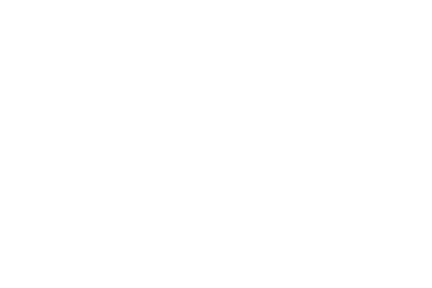

In [7]:
%matplotlib notebook
plt.plot(filter_y, filter_z, 'k')
plt.show()

In [8]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [9]:
file = open("max_valuesV.txt")
lines = file.readlines()
file.close()

snname = []
maxvalue = []

for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    maxvalue.append(co[1])
    snname.append(co[0])

maxvalue = np.array(maxvalue, dtype=float)

In [10]:
for i in range(0,len(snname)):
    
    snname[i] = snname[i][:-5]

In [11]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

85


In [12]:
for i in range(0,len(sn_names)):

    sn_names[i] = sn_names[i][:-4]

In [13]:
factors = []
names = []

In [14]:
#hist = []

In [15]:
max_list = []

In [16]:
#sn_names = ["SN2012fr"]

In [17]:
list_data = []
for k in range(0,len(sn_names)):
    
    x_lc = []
    z_lc = []

    print(sn_names[k])

    N = sn_names[k]+".dat"


    file = open(N)
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)


    z = np.reshape(xtemp, (601, 61))

    zz = []
    xx = []
    yy = []

    for i in range(0,len(y)):

        for j in range(0,len(x)):

            zz.append(z[i][j])
            xx.append(x[j])
            yy.append(y[i])
            
            
            

    wavetest = []
    
    for i in range(0,len(zz)):
    
        if zz[i] != 0:

            wavetest.append(yy[i])
    
    minvar = False
    maxvar = False
    
    for i in range(0,len(wavetest)):

        if 4760 -50 < wavetest[i] < 4760 + 50:
            minvar = True
            #print("possui minimo")

        if 6560 - 50 < wavetest[i] < 6560 + 50:
            maxvar = True
            #print("possui maximo")
    print(minvar, maxvar)
    
    
    if maxvar == True and minvar == True:
        
        print("passou")

        for j in range(0,len(x)):

            y_temp = []
            z_temp = []

            for i in range(0,len(xx)):

                if xx[i] == x[j]:

                    y_temp.append(yy[i])
                    z_temp.append(zz[i])

            f = interp1d(y_temp, z_temp)

            def S(x): return f(x)*f_filter(x)

            z_lc.append(integrate.quad(S, min(filter_y), max(filter_y))[0])
            x_lc.append(x[j])        

        list_data.append([x_lc, z_lc]) 


        #print(z_lc)

        #print(j)

        maxvaluecalc = max(z_lc)

        #print(maxvaluecalc)
        if sn_names[k] in snname:
            idx = snname.index(sn_names[k])
            max_list.append([maxvaluecalc, maxvalue[idx], sn_names[k]])  

            factors.append(maxvalue[idx]/maxvaluecalc)
            names.append(sn_names[k])


SN2009aa
True True
passou
SN2000cx
True True
passou
SN1997bq
True True
passou
SN2003fa
True True
passou
SN2005eu
True True
passou
SN2009D
True True
passou
SN2007ax
True True
passou
SN2008s1
True True
passou
SN2006D
True True
passou
SN1998bp
True True
passou
SN2013ew
True True
passou
iPTF14bdn
True True
passou
SN2005bl
True True
passou
SN2002fk
True True
passou
SN1999gp
True True
passou
SN2002jy
True True
passou
SN1997dt
True True
passou
SN2009ad
True True
passou
SN2007F
True True
passou
SN1999ac
True True
passou
SN2008ar
True True
passou
SN2002cs
True True
passou
SN2002cr
True True
passou
SN2007bc
True True
passou
SN2006ac
True True
passou
SN1995al
True True
passou
SN1996X
True True
passou
SN2006sr
True True
passou
SN2005cf
True True
passou
SN2006bt
True True
passou
SN2003kc
True True
passou
SN1998dh
True True
passou
SN2004at
True True
passou
SN2000cn
True True
passou
SN1972E
True True
passou
SN2001en
True True
passou
SN1994ae
True True
passou
SN2003it
True True
passou
SN2001da
True Tr

In [18]:
max_list

[[1.833008503536142e-11, 2.6964, 'SN2000cx'],
 [2.8706928920632644e-12, 0.966004, 'SN1997bq'],
 [3.4500968209647373e-13, 0.101731, 'SN2003fa'],
 [4.752523095751592e-13, 0.109892, 'SN2005eu'],
 [9.745709087373663e-13, 0.243193, 'SN2009D'],
 [9.6709111011467e-13, 0.275349, 'SN2007ax'],
 [7.814609393526782e-13, 0.19235, 'SN2008s1'],
 [3.9826892961201815e-12, 1.11927, 'SN2006D'],
 [1.7788489111881035e-12, 0.408193, 'SN1998bp'],
 [2.96164225513725e-12, 0.630832, 'iPTF14bdn'],
 [1.287965420297153e-13, 0.0397595, 'SN2005bl'],
 [7.180315074549134e-12, 2.49435, 'SN2002fk'],
 [1.2258536455742289e-12, 0.198067, 'SN1999gp'],
 [3.843940109085791e-13, 0.144627, 'SN2009ad'],
 [1.1897324216540593e-12, 0.231564, 'SN2007F'],
 [5.71351206845465e-12, 1.13987, 'SN1999ac'],
 [7.339667425633283e-13, 0.161879, 'SN2008ar'],
 [1.20850693698814e-12, 0.355511, 'SN2002cs'],
 [3.849915593622145e-12, 0.985338, 'SN2002cr'],
 [7.829894169712872e-13, 0.233993, 'SN2007bc'],
 [6.780725699804799e-13, 0.203503, 'SN2006ac']

<IPython.core.display.Javascript object>


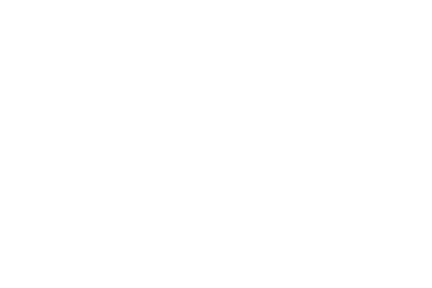

In [19]:
%matplotlib notebook

for i in range(0,len(list_data)):
    
    plt.plot(list_data[i][0],list_data[i][1])
    
    
#plt.ylim(0,7*10**(-11))
plt.show()

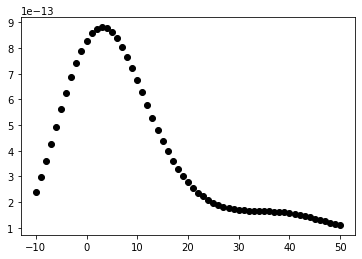

In [20]:
%matplotlib inline
plt.plot(x_lc,z_lc,'ko')
plt.show()

In [21]:
max(z_lc)

8.807319603767304e-13

In [22]:
z_lc

[2.4072108722686185e-13,
 2.9884451237031136e-13,
 3.6175778003370815e-13,
 4.272258813515747e-13,
 4.942619528003748e-13,
 5.611352223881231e-13,
 6.259798761737274e-13,
 6.868779470198394e-13,
 7.419698354891175e-13,
 7.895411752297117e-13,
 8.281302059195846e-13,
 8.566075430907839e-13,
 8.742406855424137e-13,
 8.807319603767304e-13,
 8.762318577019438e-13,
 8.613222577111115e-13,
 8.369681101024712e-13,
 8.044498219428515e-13,
 7.652784287183316e-13,
 7.211017016848514e-13,
 6.736018994357719e-13,
 6.276102620139343e-13,
 5.782469098956913e-13,
 5.267056781309869e-13,
 4.805516710381135e-13,
 4.3734505114520603e-13,
 3.9762683315902383e-13,
 3.6169950953172466e-13,
 3.2965893721951456e-13,
 3.0143662915562933e-13,
 2.7684443931737926e-13,
 2.5561760537645174e-13,
 2.37454293346333e-13,
 2.2204546786486273e-13,
 2.090962740288922e-13,
 1.9833836655247809e-13,
 1.8953215180508367e-13,
 1.8246393518777872e-13,
 1.7693747750466206e-13,
 1.7276436148576757e-13,
 1.697540374790303e-13,
 

In [23]:
save_path = '/home/joao/Documentos/PCA'

In [24]:

table = []
for l in range(0,len(names)):
    table.append((names[l],factors[l]))

name_of_file = "factors"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [25]:
factors

[147102427228.14703,
 336505518465.85724,
 294864188685.44495,
 231228755307.33438,
 249538538263.0349,
 284718778944.5726,
 246141541200.16898,
 281033722889.29486,
 229470303763.66562,
 213000742714.87784,
 308700058040.5869,
 347387262829.3578,
 161574753001.79013,
 376246756962.08185,
 194635361519.40918,
 199504260486.8959,
 220553589982.35904,
 294173735473.9644,
 255937559159.04565,
 298845673936.58746,
 300119793971.106,
 354690862920.7297,
 280563265020.9499,
 204754683485.53955,
 237291861286.69632,
 266383816615.19925,
 164718098964.61948,
 249983849698.1073,
 420657382144.373,
 253329535115.10013,
 380328628445.84326,
 199799773471.6402,
 121180421250.61113,
 245831518293.77237,
 333022629248.8011,
 362889031509.1022,
 364834679697.96,
 201587681197.43066,
 215146693315.86893,
 313669395927.31824,
 286266218980.21405,
 350918489051.1449,
 389875621841.9113,
 190948922020.0571,
 217829636241.05197,
 283585697205.5488,
 287687374877.74664,
 299736380260.29736,
 231833401544.6